**Import Libraray**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
label = pd.read_csv('labels.csv')
data = pd.read_csv('data.csv')
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


**Merge both dataset**

In [3]:
master_data = pd.merge(label,data)
master_data.head()

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
master_data.isnull().sum()

Unnamed: 0    0
Class         0
gene_0        0
gene_1        0
gene_2        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20533, dtype: int64

In [5]:
master_data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


**Week1:- Plot the merged dataset as a hierarchically-clustered heatmap.**

In [6]:
heatmap_data = pd.pivot_table(master_data, index=['Class'])
                              
heatmap_data.head()

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


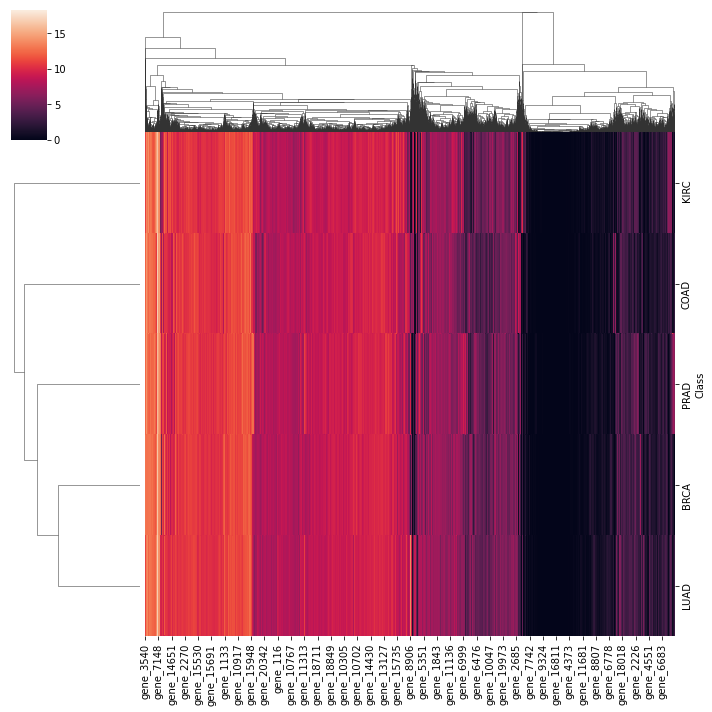

In [7]:
sns.clustermap(heatmap_data)
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',
            dpi=150, figsize=(8,12))

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


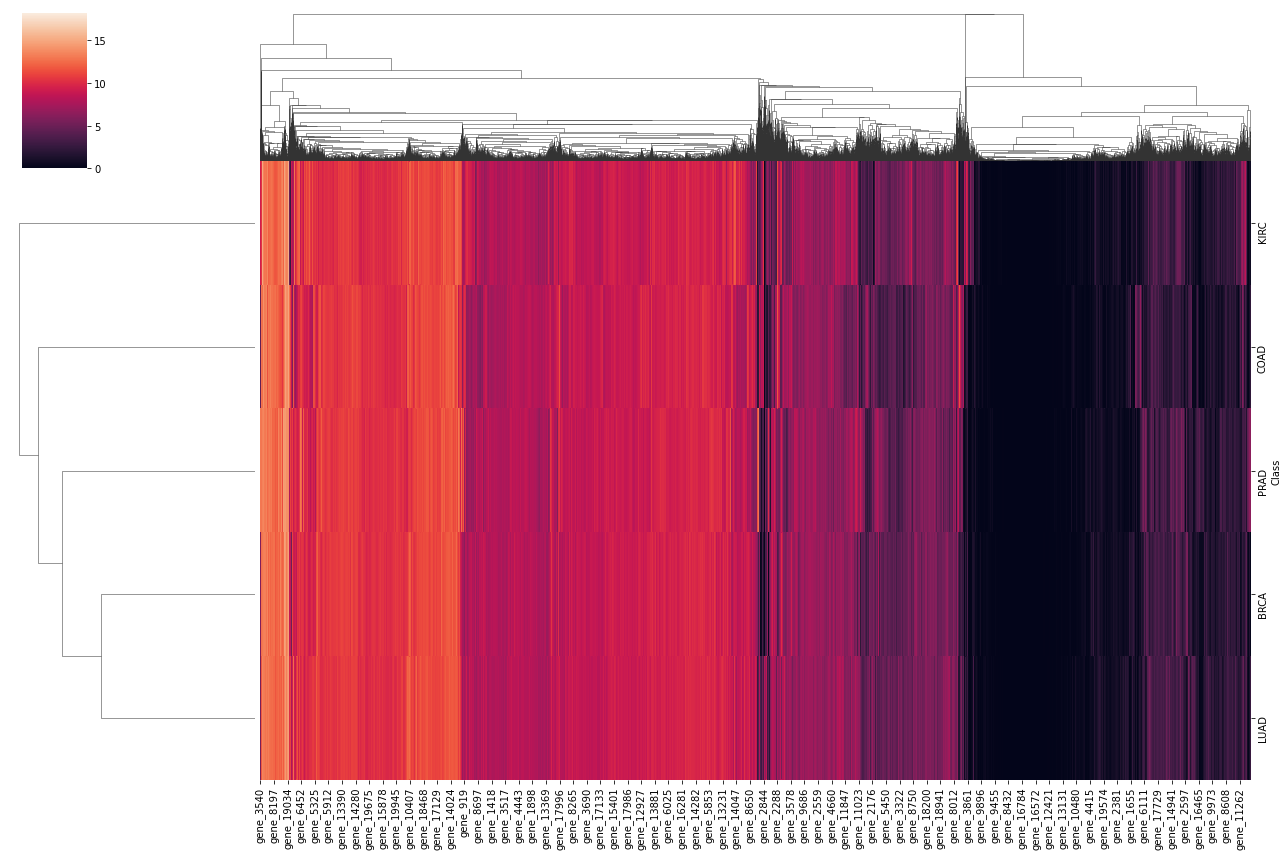

In [8]:
sns.clustermap(heatmap_data, figsize=(18,12))
plt.savefig('clustered_heatmap_with_dendrograms_Seaborn_clustermap_python.jpg',dpi=150)

**Week1:- Perform Null Hypothesis testing**

**Checking histogram to check if the data is normally distributed**

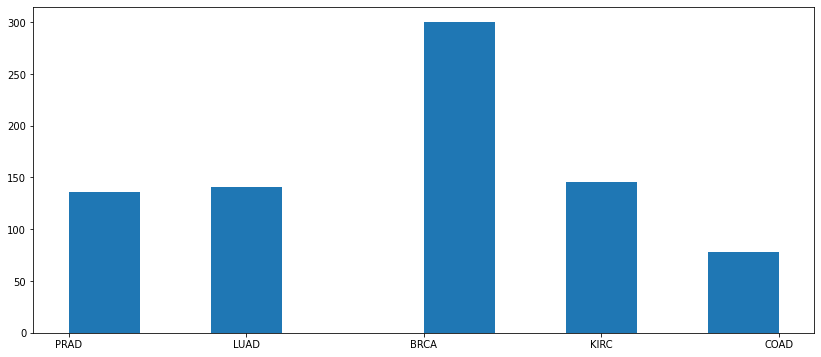

In [9]:
plt.figure(figsize=(14,6))
plt.hist(master_data['Class'])
plt.show()

In [10]:
non_cat_data = master_data.drop(['Unnamed: 0'], axis=1)
non_cat_data

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [11]:
df_f_test=master_data
def f_test(df_f_test,gene):  
    df_anova = df_f_test[[gene,'Class']]
    grps = pd.unique(df_anova.Class.values)
    grps
    d_data = {grp:df_anova[gene][df_anova.Class == grp] for grp in grps}
    F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])
    print("p_values:-",p)
    if p<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")
        
    return 

In [12]:
f_test(df_f_test,"gene_3")

p_values:- 5.472971016870503e-77
reject null hypothesis


In [13]:
f_test(df_f_test,"gene_7")

p_values:- 0.000573692937547449
reject null hypothesis


In [14]:
f_test(df_f_test,"gene_20524")

p_values:- 9.733071613348129e-129
reject null hypothesis


In [15]:
f_test(df_f_test,"gene_5")

p_values:- nan
accept null hypothesis


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [16]:
df_cat_data = master_data
df_cat_data['Class'] = df_cat_data['Class'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'COAD': 5}) 
df_cat_data = df_cat_data.drop(['Unnamed: 0'],axis=1)

**Week 2:- Dimensionality Reduction**


In [17]:
# Define data 
df_pca = master_data.drop(['Unnamed: 0'], axis=1)
df_pca = df_pca.drop(['Class'], axis=1)
df_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [18]:
df_pca.values.shape

(801, 20531)

In [19]:
x_pca = df_pca.values

**Week2:- Scaling the data using standard scaler method**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(x_pca)
X_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

**Week2:- Perform PCA with n_components=2**

In [21]:
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_with_2=PCA(n_components=2)

In [22]:
X_Scaled = np.nan_to_num(X_Scaled)

In [23]:
#Perform fit transform on the scaled data
X_pca_with_2 = pca_with_2.fit_transform(X_Scaled)
X_pca_with_2.shape

(801, 2)

In [24]:
X_pca_with_2

array([[-57.44698707,  95.41098072],
       [-16.91942986,   0.73247051],
       [-70.34521781, -19.30332709],
       ...,
       [ -4.13308983,  15.69001418],
       [-30.81475743,  33.52642262],
       [-22.34455666,   4.05235629]])

In [25]:
# Put the data back on the 2 columns defined 
df_pca = pd.DataFrame(X_pca_with_2)
df_pca.columns = ['pca1','pca2']

# Add the convereted categorical data for 
df_pca['cancer_type']=df_cat_data['Class']
df_pca

,pca1,pca2,cancer_type
0,-57.446987,95.410981,1
1,-16.919430,0.732471,2
2,-70.345218,-19.303327,1
3,-49.161591,-9.227586,1
4,-18.132533,-51.327796,3
...,...,...,...
796,-12.417385,-42.321573,3
797,-29.415554,28.526281,2
798,-4.133090,15.690014,5
799,-30.814757,33.526423,1


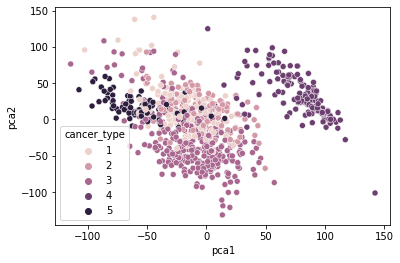

In [26]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=df_pca)

**Week2:- Dimensionality reduction using TSNE**

In [27]:
df_tsne_data = master_data
non_numeric = ['Unnamed: 0','Class']
df_tsne_data = df_tsne_data.drop(non_numeric, axis=1)
df_tsne_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [28]:
#import T-SNE from sklearn
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

In [29]:
tnse_features = m.fit_transform(df_tsne_data)
tnse_features[1:4,:]

array([[ -2.2862043,  29.575571 ],
       [  5.5155334, -45.702087 ],
       [  5.324364 , -44.868942 ]], dtype=float32)

In [30]:
tnse_features

array([[  4.046225  , -34.1382    ],
       [ -2.2862043 ,  29.575571  ],
       [  5.5155334 , -45.702087  ],
       ...,
       [-34.177338  ,  10.5509    ],
       [  2.8297143 , -40.160744  ],
       [ -0.07829101, -42.174957  ]], dtype=float32)

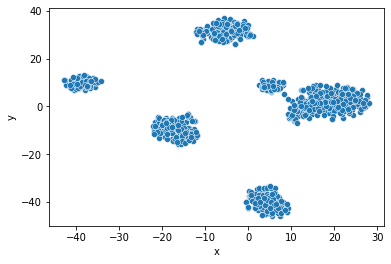

In [31]:
df_tsne_data['x'] = tnse_features[:,0]
df_tsne_data['y'] = tnse_features[:,1]

import seaborn as sns
sns.scatterplot(x='x',y='y',data=df_tsne_data)
plt.show()

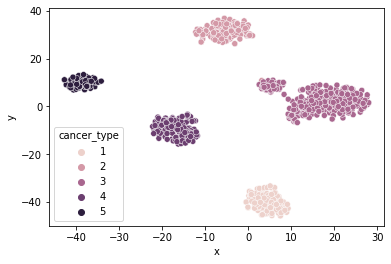

In [32]:
df_tsne_data['cancer_type']=df_cat_data['Class']
sns.scatterplot(x='x',y='y',hue = 'cancer_type', data=df_tsne_data)
plt.show()

**Week2:- Dimensionality reduction using LDA**

In [33]:
df_lda = master_data.drop(['Unnamed: 0'], axis=1)
df_lda = df_lda.drop(['Class'], axis=1)
x_lda = df_lda
x_lda

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [34]:
x_lda.shape

(801, 20531)

In [35]:
y_lda = master_data['Class']
y_lda.values

array([1, 2, 1, 1, 3, 1, 4, 1, 3, 1, 3, 4, 1, 3, 3, 3, 2, 4, 4, 1, 3, 4,
       2, 3, 4, 2, 5, 3, 3, 3, 3, 3, 4, 3, 1, 3, 4, 2, 3, 3, 4, 1, 1, 4,
       4, 3, 1, 5, 3, 2, 3, 2, 3, 1, 5, 3, 3, 5, 4, 3, 2, 4, 3, 2, 1, 5,
       3, 1, 4, 3, 4, 3, 3, 2, 3, 2, 3, 4, 1, 5, 3, 1, 3, 3, 1, 1, 3, 3,
       4, 3, 1, 1, 3, 3, 3, 1, 5, 3, 1, 3, 3, 4, 3, 4, 2, 4, 2, 5, 2, 2,
       1, 3, 2, 1, 3, 4, 4, 4, 3, 3, 2, 4, 2, 3, 1, 1, 1, 3, 4, 2, 5, 3,
       5, 3, 3, 4, 2, 3, 4, 5, 3, 1, 3, 4, 2, 5, 1, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 1, 2, 1, 2, 4, 3, 1, 2, 5, 4, 2, 3, 4, 2, 3, 2, 3, 3,
       3, 1, 3, 4, 5, 4, 3, 1, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 2, 3, 3, 3,
       2, 2, 3, 4, 4, 4, 4, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3,
       4, 2, 4, 4, 2, 3, 4, 1, 3, 2, 2, 1, 5, 3, 4, 1, 4, 5, 3, 4, 4, 2,
       1, 1, 2, 2, 4, 3, 3, 5, 3, 1, 5, 3, 1, 4, 1, 1, 1, 3, 5, 5, 2, 5,
       5, 1, 2, 3, 3, 4, 4, 3, 5, 1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 2, 1, 3,

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_r2 = lda.fit(x_lda,y_lda).transform(x_lda)

In [37]:
lda.explained_variance_ratio_

array([0.36219022, 0.30156109])

In [38]:
x_r3 = pd.DataFrame(data=x_r2)
x_r3['y']=y_lda
x_r3

,0,1,y
0,-7.958125,10.922818,1
1,-0.301563,-2.780898,2
2,-6.424952,8.870978,1
3,-6.934259,10.417199,1
4,-2.872004,-4.912284,3
...,...,...,...
796,-2.491183,-6.516482,3
797,0.217789,-1.859410,2
798,-1.426674,-0.474514,5
799,-7.800641,12.104337,1


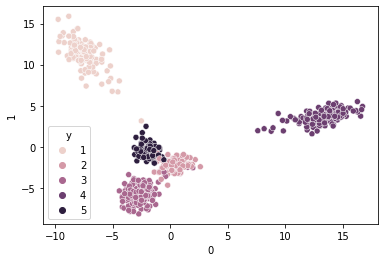

In [39]:
sns.scatterplot(x=0,y=1,hue = 'y', data=x_r3)

**Project Task: Week 3: Clustering Genes and Samples**

**KMEANS Clustering with PCA = 2**

In [40]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_with_2)

clusters.labels_

array([3, 4, 1, 1, 2, 1, 0, 4, 2, 1, 4, 0, 4, 3, 2, 2, 4, 0, 0, 1, 2, 4,
       4, 1, 0, 4, 1, 2, 1, 2, 2, 2, 0, 3, 1, 2, 0, 4, 1, 3, 0, 1, 4, 0,
       0, 2, 3, 1, 2, 4, 2, 1, 2, 1, 1, 1, 2, 1, 0, 4, 4, 4, 2, 4, 1, 1,
       4, 1, 0, 1, 0, 4, 1, 4, 2, 1, 2, 3, 4, 1, 2, 1, 2, 2, 3, 4, 2, 1,
       0, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2, 4, 2, 0, 2, 0, 4, 0, 1, 1, 1, 2,
       3, 2, 4, 1, 2, 0, 0, 0, 2, 2, 4, 0, 1, 1, 4, 4, 1, 2, 0, 1, 1, 1,
       3, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 4, 3, 3, 2, 4, 1, 4, 4, 2, 2,
       4, 4, 2, 1, 1, 4, 3, 4, 0, 4, 4, 4, 1, 0, 4, 2, 0, 4, 2, 1, 2, 1,
       4, 4, 2, 0, 1, 0, 2, 4, 1, 4, 4, 4, 2, 4, 4, 0, 3, 2, 4, 2, 3, 2,
       1, 4, 2, 0, 0, 0, 0, 2, 3, 1, 4, 4, 4, 2, 4, 1, 4, 2, 2, 2, 4, 4,
       0, 4, 0, 0, 4, 2, 0, 1, 2, 4, 3, 2, 1, 3, 0, 4, 0, 1, 4, 0, 0, 2,
       1, 4, 4, 1, 0, 2, 2, 1, 2, 1, 4, 2, 4, 0, 3, 4, 4, 2, 4, 1, 2, 1,
       1, 1, 2, 1, 2, 0, 0, 2, 1, 3, 0, 1, 2, 2, 0, 2, 2, 2, 3, 1, 4, 2,
       2, 2, 0, 0, 0, 0, 3, 2, 2, 0, 2, 2, 4, 4, 4,

In [41]:
pca_with_2_data_frame = pd.DataFrame(data=X_pca_with_2,columns=['pca1','pca2'])
pca_with_2_data_frame.head()

,pca1,pca2
0,-57.446987,95.410981
1,-16.919430,0.732471
2,-70.345218,-19.303327
3,-49.161591,-9.227586
4,-18.132533,-51.327796


In [42]:
pca_with_2_data_frame['Cls_label'] = clusters.labels_
pca_with_2_data_frame['given_cancer_type'] = label.Class.values
pca_with_2_data_frame

,pca1,pca2,Cls_label,given_cancer_type
0,-57.446987,95.410981,3,PRAD
1,-16.919430,0.732471,4,LUAD
2,-70.345218,-19.303327,1,PRAD
3,-49.161591,-9.227586,1,PRAD
4,-18.132533,-51.327796,2,BRCA
...,...,...,...,...
796,-12.417385,-42.321573,2,BRCA
797,-29.415554,28.526281,1,LUAD
798,-4.133090,15.690014,4,COAD
799,-30.814757,33.526423,1,PRAD


In [43]:
brca = pca_with_2_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca.Cls_label.value_counts()

2    201
1     41
4     39
3     19
Name: Cls_label, dtype: int64

In [44]:
luad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad.Cls_label.value_counts()

4    92
1    30
2    12
3     6
0     1
Name: Cls_label, dtype: int64

In [45]:
coad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('COAD')
coad.Cls_label.value_counts()

1    60
3    11
4     7
Name: Cls_label, dtype: int64

In [46]:
prad = pca_with_2_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad.Cls_label.value_counts()

1    54
4    51
2    16
3    15
Name: Cls_label, dtype: int64

In [47]:
kirc = pca_with_2_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc.Cls_label.value_counts()

0    138
4      7
3      1
Name: Cls_label, dtype: int64

In [48]:
clusters.cluster_centers_

array([[ 80.9317192 ,  32.80898519],
       [-41.52706394,  13.90127368],
       [ -2.53772417, -51.80975507],
       [-60.18008731,  71.44922832],
       [  0.94886308,   5.1435292 ]])

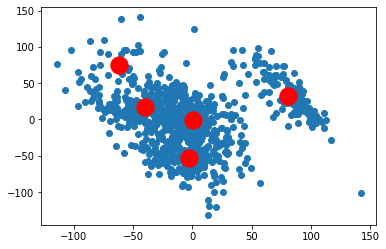

In [49]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_2)
plt.scatter(X_pca_with_2[:,0], X_pca_with_2[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

**Week 4: Build Classification Models**

In [50]:
ml_x = x_lda
ml_y = y_lda
ml_x.shape,ml_y.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size=0.30,random_state=30)

**SVM**

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(x_train,y_train)
sv_clf.score(x_test,y_test)

1.0

In [52]:
y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


**Random Forest**

In [53]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

0.991701244813278

**One way F test**

In [54]:
df_tsne = pd.DataFrame(data=tnse_features,columns=['tsne1','tsne2'])
df_tsne['cancer_type']=label['Class']
df_tsne

,tsne1,tsne2,cancer_type
0,4.046225,-34.138199,PRAD
1,-2.286204,29.575571,LUAD
2,5.515533,-45.702087,PRAD
3,5.324364,-44.868942,PRAD
4,20.144863,2.330650,BRCA
...,...,...,...
796,20.955769,-0.100036,BRCA
797,-11.451038,31.648579,LUAD
798,-34.177338,10.550900,COAD
799,2.829714,-40.160744,PRAD


In [55]:
df_anova_tsne = df_tsne[['tsne2','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne2'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [56]:
df_anova_tsne = df_tsne[['tsne1','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne1'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


**Deep Neural Network**

In [57]:
features=master_data.drop(['Unnamed: 0'],axis=1)
features=features.drop(['Class'],axis=1)
target=master_data['Class']
features.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [58]:
target.head()

0    1
1    2
2    1
3    1
4    3
Name: Class, dtype: int64

In [59]:
f1=features.values

In [60]:
y1 = pd.get_dummies(y_lda)

In [61]:
from sklearn.model_selection import train_test_split

#y1 = pd.get_dummies(Xg_fea.Pos_Neg)

X1_train, X1_valid, y1_train, y1_valid = train_test_split(f1,y1, test_size = 0.10, random_state=42)

In [62]:
X1_train.shape,X1_valid.shape,y1_valid.shape,y1_train.shape


((720, 20531), (81, 20531), (81, 5), (720, 5))

In [63]:
import tensorflow as tf
#Initialize Sequential model
model = tf.keras.models.Sequential()

#adding layers of inout
model.add(tf.keras.layers.Dense(10000, input_dim=20531, activation='relu', kernel_initializer='he_uniform'))


#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(5000, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(2000, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(1000, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(500, activation='relu'))

#Add 5th hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 6th hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             205320000 
                                                                 
 batch_normalization (BatchN  (None, 10000)            40000     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_2 (Dense)             (None, 2000)              10002000  
                                                                 
 dense_3 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                        

In [65]:
history = model.fit(X1_train,y1_train,          
          validation_data=(X1_valid,y1_valid),
          epochs=5,
          batch_size=32)

Epoch 1/5
23/23 [==============================] - 56s 2s/step - loss: 0.2725 - accuracy: 0.9236 - val_loss: 9.5990 - val_accuracy: 0.5309
Epoch 2/5
23/23 [==============================] - 35s 1s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 4.4738 - val_accuracy: 0.3951
Epoch 3/5
23/23 [==============================] - 31s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.2532 - val_accuracy: 0.5802
Epoch 4/5
23/23 [==============================] - 31s 1s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6673 - val_accuracy: 0.7407
Epoch 5/5
23/23 [==============================] - 30s 1s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9630


In [66]:
xyz = model.predict(X1_valid)

In [67]:
y_pr=[]
for k in xyz:
    #np.argmax(k)
    #print(np.argmax(k))
    y_pr.append(np.argmax(k))
    
y_val=[]
for k in y1_valid.values:
    #np.argmax(k)
    #print(np.argmax(k))
    y_val.append(np.argmax(k))

In [68]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pr)

array([[14,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  0, 31,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  3,  0,  4]])